In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

from parse_database import read_header_database, parse_header_database, VarRange

In [44]:
file_database = '../databases/Tcritical.csv'

header = read_header_database(file_database)
Trange, comp_range = parse_header_database(header)

comp_range

OrderedDict([('C', <parse_database.VarRange at 0x7fd44afe2630>),
             ('Mn', <parse_database.VarRange at 0x7fd44afe26d8>),
             ('Si', <parse_database.VarRange at 0x7fd44afe2748>),
             ('Cr', <parse_database.VarRange at 0x7fd44afe27b8>),
             ('Ni', <parse_database.VarRange at 0x7fd44afe2828>)])

In [18]:
print(comp_range['C'].min,
      comp_range['C'].max, 
      comp_range['C'].step,
      comp_range['C'].lvls)

0.0 0.015 0 11


In [19]:
newshape = (comp_range['C'].lvls, comp_range['Mn'].lvls, 
            comp_range['Si'].lvls, comp_range['Cr'].lvls, 
            comp_range['Ni'].lvls)

print(newshape)

(11, 5, 5, 5, 5)


In [46]:
dataset = pd.read_csv(file_database, comment='#')
dataset.head()

,file,macro,C,Mn,Si,Cr,Ni,A1,A1prime,A3,eutectoid
0,../results/00000.DAT,../macros_thermocalc/macro_1.tcm,0.0,0.000001,0.000001,0.000001,0.000001,1184.790,1184.790,1184.80,hipo
1,../results/00001.DAT,../macros_thermocalc/macro_1.tcm,0.0,0.000001,0.000001,0.000001,0.007501,1129.470,1129.470,1153.41,hipo
2,../results/00002.DAT,../macros_thermocalc/macro_1.tcm,0.0,0.000001,0.000001,0.000001,0.015000,1078.020,1078.020,1126.40,hipo
3,../results/00003.DAT,../macros_thermocalc/macro_1.tcm,0.0,0.000001,0.000001,0.000001,0.022500,1027.990,1027.990,1102.75,hipo
4,../results/00004.DAT,../macros_thermocalc/macro_1.tcm,0.0,0.000001,0.000001,0.000001,0.030000,978.821,978.821,1081.80,hipo


In [75]:
dataset_multidim = OrderedDict()

dataset_multidim['C'] = dataset['C'].values.reshape(newshape)
dataset_multidim['Mn'] = dataset['Mn'].values.reshape(newshape)
dataset_multidim['Si'] = dataset['Si'].values.reshape(newshape)
dataset_multidim['Cr'] = dataset['Cr'].values.reshape(newshape)
dataset_multidim['Ni'] = dataset['Ni'].values.reshape(newshape)
dataset_multidim['A1'] = dataset['A1'].values.reshape(newshape)
dataset_multidim['A3'] = dataset['A3'].values.reshape(newshape)
dataset_multidim['A1prime'] = dataset['A1prime'].values.reshape(newshape)

dataset_multidim['C'].shape

(11, 5, 5, 5, 5)

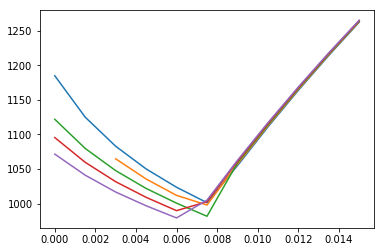

In [76]:
for j in range(comp_range['Mn'].lvls):
    plt.plot(dataset_multidim['C'][:,j,0,0,0], dataset_multidim['A3'][:,j,0,0,0])
